<img align="left" width="150px" height="150px" src="https://astra.dk/sites/default/files/DTU%20logo.png" alt="logo"/>
<h1 align="right"> Social Graphs and Interactions (02805)</h1>


<h1 align=center> EXERCISES ASSIGNMENT 1</h1>

In [1]:
# Python libraries
import re
import random
import requests
import itertools

# Data analysis libraries 
import numpy as np
import pandas as pd
import networkx as nx

# Visualization libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1: Binning degree distributions
***
### 1.1 Binning real numbers

**1.1.1 Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**

In [2]:
# Variable definitions
mu = 2
sigma = 0.125
elem = 5000
# 5000 data points are drawn from a Gaussian distribution. This is done via list comprehension syntax
nums = [random.gauss(mu,sigma) for i in range(elem)]

**1.1.2 Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?**

In [3]:
counts, bin_edges = np.histogram(nums,bins=10)
print(f'This is value counts: {counts}, which has a total of  {len(counts)} elements')
print(f'This is bin_edges: {np.round(bin_edges,2)}, which has a total of {len(bin_edges)} elements ')
print(f'Are this the same length? {len(counts)==len(bin_edges)}')

This is value counts: [   3   13  159  549 1198 1548 1021  426   73   10], which has a total of  10 elements
This is bin_edges: [1.48 1.58 1.67 1.77 1.87 1.96 2.06 2.16 2.25 2.35 2.45], which has a total of 11 elements 
Are this the same length? False


<font color="#0B498F">The function `numpy.histogram` returns as **first argument the number of values** that fall into each bin. It also returns as **second argument the bin edges**. This two outputs are NOT the same length because there is always 2 edges per each bin. Therefore, the number of bin edges will always be equal to the number of bins plus 1. </font>

**1.1.3 Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

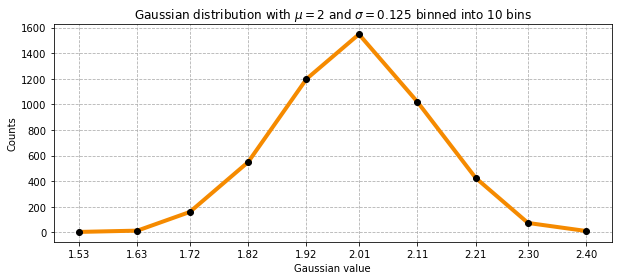

In [4]:
# Find the middle value between edges. Generates a list of bins.
# For example: bin_edges = [1,2,3] -> bin_list = [1.5,2.5]
x_bins = [np.round(np.mean((bin_edges[i],bin_edges[i+1])),2) for i in range(len(bin_edges)-1)]

# Plotting
# Create figure
f = plt.figure(figsize=(10, 4))
# Get the current axes on the created figure
ax = f.gca()
plt.plot(x_bins,counts,color='#f58a00',linewidth='4')
plt.plot(x_bins,counts,'o',color='k')

# Style plots
ax.set_title('Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$ binned into 10 bins')
ax.set_xlabel("Gaussian value", fontsize=10)
ax.set_ylabel("Counts", fontsize=10)
# Dashed grid line style
plt.grid(linestyle="--")

# Change grid divisions to match the number of bins so it is easier to read 
plt.xticks(x_bins)
plt.show()

<font color="#0B498F">In order to fit the dimensions of the bins and bin edges for plotting, the centerpoint of the bins are found by calculating the mean of bin edges. Above we see, as expected, a Gaussian distribution centered around 2. </font>

### 1.2 Binning integers
**1.2.1 But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.** 

In [5]:
# Variables are defined and 5000 data points are drawn from a Poisson distribution
lamda = 10 # lamda because 'lambda' is protected
elem = 5000
pnums = np.random.poisson(lamda, elem)

print(f'The maximum is: {max(pnums)}')
print(f'The minimum is: {min(pnums)}')

The maximum is: 24
The minimum is: 1


**1.2.2 Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In [6]:
# Creation of vector v as explained below
v = np.arange(min(pnums)-0.5, max(pnums)+1.5)
counts, bin_edges = np.histogram(pnums, v)
print(f'Sum over bin counts: {sum(counts)}')

Sum over bin counts: 5000


<font color="#0B498F"> The binning-vector $v$ must be an edge list of the bin values. For this reason, the first element $v$ has to be **one half-bin step less than the minimum** value. On the other hand, the last element of $v$ has to be the left most edge which corresponds to **half-bin step more than the maximum** value plus 1 because there is always one more edge than bins. In our case, the bin step is 1.</font>

**1.2.3 Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution**

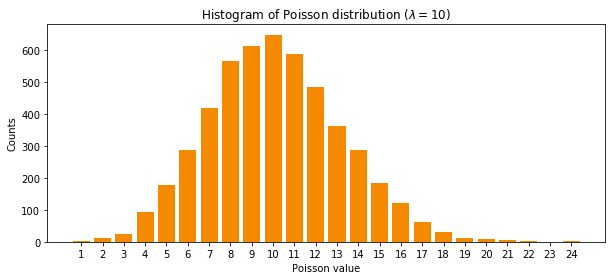

In [7]:
# The center values of the bin edges are found.
x_bins = [np.mean((bin_edges[i],bin_edges[i+1])) for i in range(len(bin_edges)-1)]

# Plotting 
f = plt.figure(figsize=(10, 4))
ax = f.gca()
plt.bar(x_bins,counts, color='#f58a00')

# Plot options
ax.set_title('Histogram of Poisson distribution ($\lambda = 10$)')
ax.set_xlabel("Poisson value", fontsize=10)
ax.set_ylabel("Counts", fontsize=10)
plt.xticks(x_bins)
plt.show()

### 1.3 Binning and plotting degree distributions

**1.3.1 Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
Hint: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.**

<font color="#0B498F"> Since $$\langle k \rangle = p\,(N-1),$$

it follow naturally that $$p = \dfrac{\langle k \rangle}{N-1}.$$

In [8]:
N = 5000
k = 10
p = k/(N-1)
print("p = {:.1}".format(p))

p = 0.002


**1.3.2 Now, use `networkx` to create the graph and extract the degree distribution.**

In [9]:
# A Erdös-Renyi graph is created with the given N and found p.
G_er = nx.erdos_renyi_graph(N,p)
# The degrees are extracted as a dict which we stored as a list for easy access.
degrees = list(dict(nx.degree(G_er)).values()) 

**1.3.3 Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

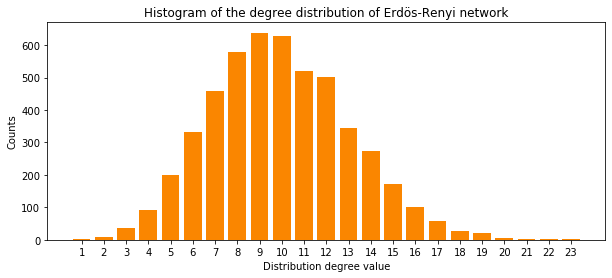

In [10]:
v = np.arange(min(degrees)-0.5, max(degrees)+1.5)
counts, bin_edges = np.histogram(degrees, v)

# Middle points of the bin-edges are again calculated.
x_bins = [np.mean((bin_edges[i],bin_edges[i+1])) for i in range(len(bin_edges)-1)]

# Figure creation and plotting.
f = plt.figure(figsize=(10, 4))
ax = f.gca()
plt.bar(x_bins,counts,color='#fa8600')

# Plot options
ax.set_title('Histogram of the degree distribution of Erdös-Renyi network')
ax.set_xlabel("Distribution degree value", fontsize=10)
ax.set_ylabel("Counts", fontsize=10)
plt.xticks(x_bins)
plt.show()

<font color="#0B498F"> The number of bins and their edges are calculated as before. Once again, the center points of the bin edges are calculated so as to match the dimensions. 

We see that the histogram is indeed similar to the histogram from before.</font>

## Part 2: Random networks and plotting in `networkx`
***

### 2.1 Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Consider an Erdős-Rényi network with $N = 3,000$ nodes, connected to each other with probability $p = 10^{–3}$.

**2.1.1 What is the expected number of links, $〈L〉$?**

<font color="#0B498F"> The expected number of links is as per box 3.11 in _Network Science_ (Barabási) given by 
    
$$\langle L\rangle = \dfrac{pN(N-1)}{2}.$$ 
</font>

In [11]:
N = 3000
p = 0.001
L_avg = p*N*(N-1)/2
print(f"Expected average number of links:\nL_avg = {L_avg}")

Expected average number of links:
L_avg = 4498.5


**2.1.2 In which regime is the network?**

<font color="#0B498F"> The regime of a network is given by its average degree, $\langle k\rangle$. This number is then compared to $\ln N$. </font>

In [12]:
k=np.round(p*(N-1),2)
lim = np.round(np.log(N),2)
print(f'The average degree of the network is {k}.')
print(f'The fully connected the limit is {lim}.')

The average degree of the network is 3.0.
The fully connected the limit is 8.01.


<font color="#0B498F"> As the average degree is between 1 and 8.01 (ln N) the network is expected to be **supercritical**, as per section 3.6 in _Network Science_.</font>

**2.1.3 Calculate the probability $p_{c}$ so that the network is at the critical point**

<font color="#0B498F"> The critical point when the degree $\langle k\rangle$ is 1. The boundary between regimes,    such that for values below $p_{c}$ a giant component has not yet formed and for values above $p_{c}$, a giant component has formed. It is given by  $$p_c = \dfrac{\langle k\rangle}{(N-1)}\approx \dfrac{\langle k\rangle}{N}$$

Equation 3.10 in *Network Science*, such that $\langle k \rangle = 1$.

In [13]:
k=1
pc = np.round(k/(N-1),5)
print(f'The critical point is {pc}')

The critical point is 0.00033


**2.1.4 Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.**

<font color="#0B498F"> When a network has only one component, it is said to be connected. This is the case when $\langle k \rangle > \ln N$ (section 3.7 in *Network Science*). We wish to find the N-value, $N^{cr}$, for which this is true. The equation is rewritten: $$\langle k \rangle = \ln N \implies p(N-1) = \ln N$$ Plugging in the given _p_-value, we get: $$\dfrac{N-1}{1000}=\ln N$$
    
The value of _N_ we're looking for is thus the intersection of the graphs on either side of the equation. These are plotted for different N-values.

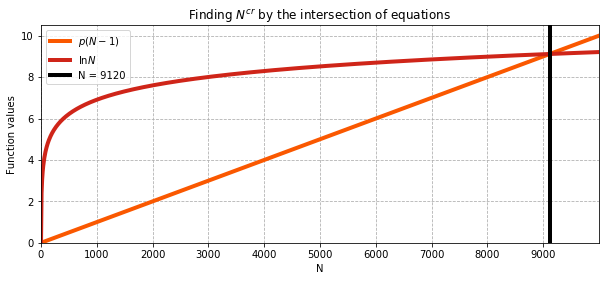

In [14]:
# Given probability
p = 1e-3

# Initialise 1000 even spaced values of N from 1 to 10000.
N = np.linspace(1,10000,1000)

# Figure definition
f = plt.figure(figsize=(10, 4))
ax = f.gca()

# Plot of left-hand side
plt.plot(N,p*(N-1),color='#fa5800',linewidth=4)
# Plot of right-hand side
plt.plot(N,np.log(N),color='#cf2519',linewidth=4)
# Plot of vertical line at intersection
plt.axvline(x=9120,color='k',linewidth=4)

# Plot options
plt.grid(linestyle="--")
plt.xlim(0,10000)
plt.ylim(0,np.max((np.max(p*(N-1)),np.max(np.log(N))))+0.5)
plt.xlabel('N')
plt.ylabel('Function values')
plt.title('Finding $N^{cr}$ by the intersection of equations')
plt.legend(['$p(N-1)$','$\ln N$','N = 9120'])
plt.xticks(np.arange(0,10000,1000))
plt.show()

<font color="#0B498F"> We see that the graphs intersect at around $N\approx9120$, which is thus our $N^{cr}$. We see that this approximation holds somewhat by evaluating both sides of the equation at $N^{cr}$. The value is stored for later use:

In [15]:
print("{:.4} ~ {:.4}".format(p*(9120-1), np.log(9120)))
K_avg = np.log(9120)

9.119 ~ 9.118


**2.1.5 For the network in (2.1.4), calculate the average degree $〈k^{cr}〉$ and the average distance between two randomly chosen nodes 〈d〉.**

<font color="#0B498F">  The average degree, $\langle k \rangle$ is simply either side of the previous equation. That is,
    $$\langle k\rangle \approx 9.12.$$ The average distance is given by $$\langle d \rangle \propto \dfrac{\ln N}{\ln \langle k \rangle},$$ as per *Network Science*, box 3.11.

In [16]:
print("Average distance: {:.3}".format(np.log(9120)/np.log(9.118)))

Average distance: 4.13


**2.1.6 Calculate the degree distribution $p_{k}$ of this network (approximate with a Poisson degree distribution).**

<font color="#0B498F">  The degree distribution in the Poisson form is given by $$p_k = \mathrm{e}^{-\langle k \rangle}\dfrac{\langle k \rangle^k}{k!},$$
    
as per *Network Science*, box 3.11.
    
We approximate the network with the calculated average degree and critical number of nodes by a Poisson-distribution. From this distribution, we extract the minimum and maximum values. We then calculate $p_k$ for this range of numbers. These probabilities are plotted against the element value, $k$.

In [17]:
# Poisson distribution and min/max-values.
poisson = np.random.poisson(K_avg,9120)
minval = np.min(poisson)
maxval = np.max(poisson)

# Degree distribution as per the given formula
pk = [np.exp(-K_avg) * np.power(K_avg,k)/np.math.factorial(int(k)) for k in np.arange(minval,maxval)]

<font color="#0B498F"> We then plot the degree distribution $p_{k}$ for clarity.

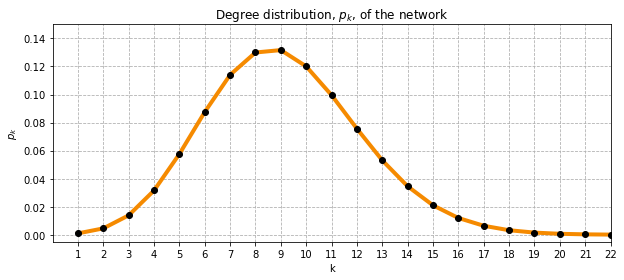

In [18]:
# Figure creation
f = plt.figure(figsize=(10, 4))
ax = f.gca()

# Plot of dots and lines
plt.plot(np.arange(minval,maxval),pk,color="#f58a00",linewidth='4')
plt.plot(np.arange(minval,maxval),pk,'o',color="k")

# Labels and title
plt.xlabel('k')
plt.ylabel('$p_k$')
plt.title('Degree distribution, $p_k$, of the network')

# Grid, ticks and limits.
plt.grid(linestyle="--")
plt.xticks(x_bins)
plt.xlim(0,22)
plt.ylim(-0.005, 0.15)

plt.show()

### 2.2 Paths

**2.2.1 Plot a random network with $200$ nodes and an average degree of $1.5$. (I suggest using `networkx.draw` and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**

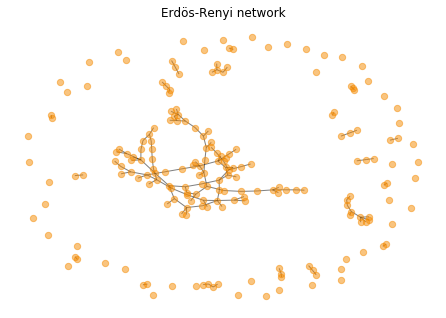

In [19]:
# Variable definitions
N = 200
k = 1.5
p = k/(N-1)

# Network creation. The gnp_random_graph is a Erdös-Renyi network.
G_random = nx.gnp_random_graph(N,p)

nx.draw(G_random, node_size = 40, with_labels=False,node_color='#f58a00', alpha=0.5,width=1)
plt.title("Erdös-Renyi network")
plt.show()

**2.2.2 Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)**

<font color="#0B498F">  The Giant Connected Component is extracted by first extracting all subgraphs and simply choosing the largest one.

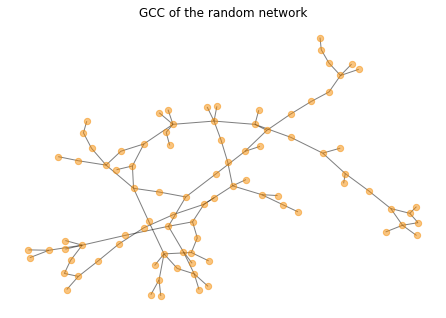

In [20]:
# Finds the maximum of the count of nodes for each sub-component
connected_component_subgraphs = (graph.subgraph(c) for c in nx.connected_components(graph))
gcc = max(nx.connected_component_subgraphs(G_random), key=len)
nx.draw(gcc, node_size = 40, with_labels=False,node_color='#f58a00', alpha=0.5,width=1)
plt.title("GCC of the random network")
plt.show()

<font color="#0B498F"> Here, the GCC - the giant connected component - has been extracted and drawn.

**2.2.3 Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)**

In [21]:
node = np.random.choice(nx.nodes(gcc))
print(f'The random node is number {node}.')

The random node is number 147.


**2.2.4 Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)**

In [22]:
# Finds the shortest path between the specified node to the rest of the connected network 
near_nodes_dict = nx.single_source_shortest_path_length(gcc, node)
# Returns list of nodes with distance 2
near_nodes = [key for key,value in near_nodes_dict.items() if value == 2]
print(f'The 2 steps away node numbers are: {near_nodes}'.replace('[','').replace(']',''))

The 2 steps away node numbers are: 37, 47


**2.2.5 Plot the GCC with the following choice of colors. Starting node black (`"#000000"`). The nodes 2 steps away red (`"#ff0000"`). All other nodes blue (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading the documentation carefully find out how to color individual nodes.**

<font color="#0B498F">  A color-mapping is created for the nodes of the network by creating a function that adds the correct color depending on whether we're at the starting node or two steps away - if neither is the case, the third colour is added.

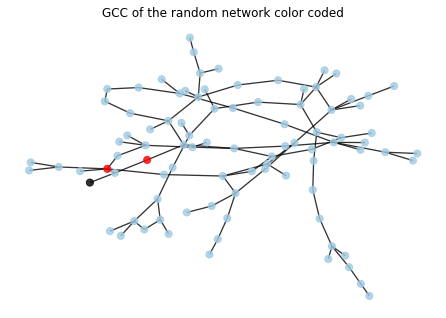

In [23]:
# Custom mapping function. Returns color depending on the input distance
def color_mapping(value):
    if value == 0: return "#000000"
    elif value == 2: return "#ff0000"
    else: return "#A0CBE2"
# It is important to sort the nodes as in gcc.nodes() 
# so that the node_color argument of nx.draw() maps precisely to the desired node from gcc
color_map = [color_mapping(near_nodes_dict[i]) for i in gcc.nodes()]
nx.draw(gcc, node_size=50, node_shape='o',width=1.3, with_labels=False, node_color=color_map, alpha=0.8)
plt.title("GCC of the random network color coded")
plt.show()

## Part 3: Watts-Strogatz Networks
***

**3.1 Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probability $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

In [24]:
# Variable definitions
n = 500
k = 4
p = [0,0.1,1]

# For each of the p-values, a graph is created from which the average shortest path length is calculated.
for p_i in p:
    G_ws_1 = nx.watts_strogatz_graph(n,k,p_i)
    d = np.round(nx.average_shortest_path_length(G_ws_1),2)
    print(f'The average shortest path length for p({p_i}) is {d}')

The average shortest path length for p(0) is 62.88
The average shortest path length for p(0.1) is 7.42
The average shortest path length for p(1) is 4.76


<font color="#0B498F">  When $p = 1$, the network is simply a **random network**.

**3.2 Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

<font color="#0B498F"> The p-values are initialised, as are N and k. For each p-value, 50 networks are created. The average shortest path length is then calculated. After these 50 networks are created, the mean and standard deviation is calculated. Finally, the average shortest paths with their standard deviations are plotted against the p-value.
    
**Note: the creation of the graphs may take several minutes.**

In [25]:
# Definitions
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
networks = 50
y = []
y_err = []
seed = 1

# Network creation and value extraction
for p_i in p:
    d_avg = []
    for net in range(networks):
        G_ws = nx.watts_strogatz_graph(N,k,p_i,seed)
        d_avg.append(nx.average_shortest_path_length(G_ws))
        seed += 1
    y.append(np.average(d_avg))
    y_err.append(np.std(d_avg))

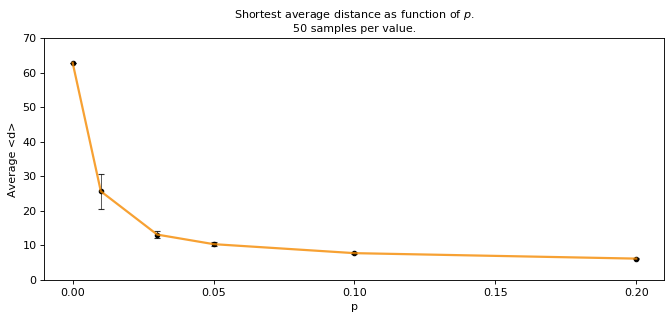

In [26]:
# Plotting 
f = plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
ax = f.gca()

# Style plots
ax.errorbar(p,y,y_err,ecolor='k', color = '#f58a00',alpha=0.8, capsize=3, elinewidth=0.7,linewidth=2,ms=4)
plt.plot(p,y,'o',color='k',markersize='4')
plt.xlabel('p', fontsize=10)
plt.ylabel('Average <d>', fontsize=10)
plt.title('Shortest average distance as function of $p$. \n50 samples per value.', fontsize=10)
plt.xticks(np.linspace(0, 0.2, num=5))
plt.ylim(0,70)
plt.show()

## Part 4: The Barabasi-Albert Model
***
__We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success__

**4.1 Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

<font color="#0B498F"> A simple network of 2 connected nodes is created. This edge-pair is saved in an edge-list. An additional node is added, which is connected to a random node from the edge-list. This new edge-pair is added to the list. This is done until the network contains 100 nodes. 

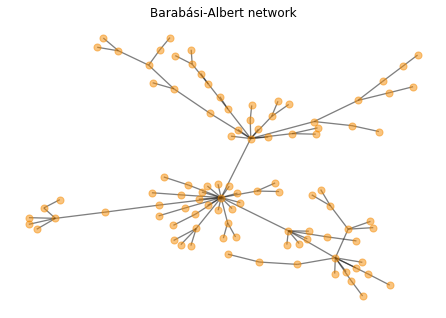

In [27]:
G_ba = nx.Graph()
G_ba.add_edge(1,2)
node_num = 100
for node in range(3,node_num+1):
    # The list of edges is disassembled. A random node is chosen from this list. 
    # A new edge is drawn from the current node to it.
    G_ba.add_edge(np.random.choice(list(itertools.chain.from_iterable(G_ba.edges()))),node)
nx.draw(G_ba, node_size=50, node_shape='o',width=1.3, with_labels=False, node_color="#f58a00", alpha=0.5)
plt.title("Barabási-Albert network")
plt.show()

**4.2 Now create a 5000 node network.**

<font color="#0B498F">  Same code is used as before, where a total of 5000 nodes are added to the network.

In [28]:
G_ba = nx.Graph()
G_ba.add_edge(1,2)
node_num = 5000
for node in range(3,node_num+1):
    G_ba.add_edge(np.random.choice(list(itertools.chain.from_iterable(G_ba.edges()))),node)

**4.2.1 What's the maximum and minimum degree?**

In [29]:
degree_list = list(dict(G_ba.degree()).values())
print(f'The minimum degree is {min(degree_list)}')
print(f'The minimum degree is {max(degree_list)}')

The minimum degree is 1
The minimum degree is 152


**4.2.2 Now, bin the degree distribution, for example using `numpy.histogram`.**

In [30]:
y,x = np.histogram(degree_list,max(degree_list))
x_bins = [np.mean((x[i],x[i+1])) for i in range(len(x)-1)]

**4.2.3 Plot the distribution. Plot it with both linear and log-log axes.**

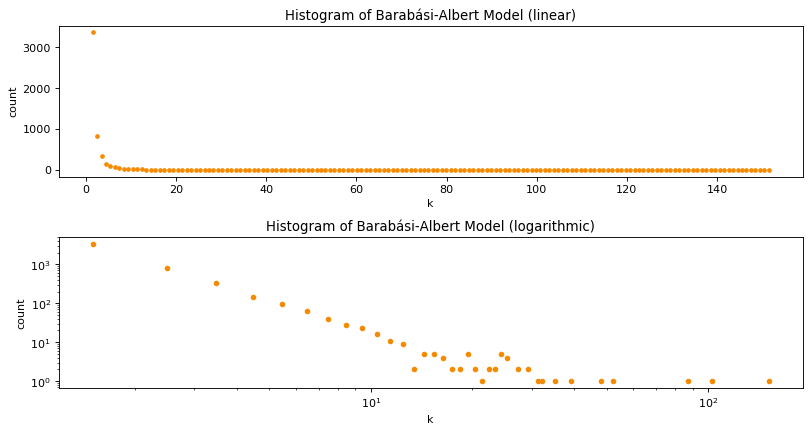

In [31]:
# Figure creation
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# Linear plot
plt.subplot(2,1,1)
plt.scatter(x_bins,y, 10,color='#f58a00')
plt.xlabel('k')
plt.ylabel('count')
plt.title('Histogram of Barabási-Albert Model (linear)')

# Logarithmic plot
plt.subplot(2,1,2)
plt.loglog(x_bins,y,'o',markersize=4,color='#f58a00')
plt.xlabel('k')
plt.ylabel('count')
plt.title('Histogram of Barabási-Albert Model (logarithmic)')

plt.subplots_adjust(hspace=0.4)
plt.show()

<font color="#0B498F"> As we can see from the log-log plot, the Barabási-Albert model approximately follows the power-law, in that the data points lie on a straight line.

## Part 5: Power-laws and the friendship paradox
***
Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

**5.1 Pick a node _i_ at random (e.g. use `random.choice`).**

In [32]:
node = np.random.choice(list(dict(G_ba.degree()).keys()))
degree = G_ba.degree(node)
print(f'Node number: {node}')
print(f'Node degree: {degree}')

Node number: 838
Node degree: 3


**5.2 Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.**

In [33]:
print(f'The neighbor nodes are: {list(G_ba.neighbors(node))}'.replace('[', '').replace(']', ''))
print(f'Average degree of the neighbors is {np.average([G_ba.degree(i) for i in G_ba.neighbors(node)])}')
NDA = np.average([G_ba.degree(i) for i in G_ba.neighbors(node)])

The neighbor nodes are: 89, 1502, 3492
Average degree of the neighbors is 5.0


**5.3 Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.**

In [34]:
if NDA > degree:
    print("The friendship paradox for the i'th node is TRUE")
else:
    print("The friendship paradox for the i'th node is not TRUE")

The friendship paradox for the i'th node is TRUE


**5.4 Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

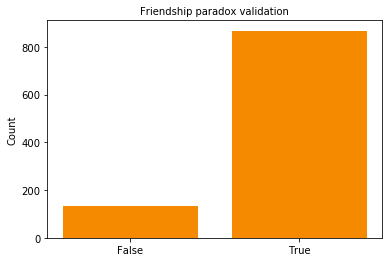

In [35]:
reps = 1000
result = []

# 1000 nodes are randomly chosen. Their degree and their neighbours' degrees are calculated.
# True/false is saved in the results list.
for c in range(reps):
    node = np.random.choice(list(dict(G_ba.degree()).keys()))
    degree = G_ba.degree()[node]
    neighbors = np.average([G_ba.degree(i) for i in G_ba.neighbors(node)])
    result.append(int(degree < neighbors))

# Histogram plot
y = np.histogram(result,2)[0]
x = ['False', 'True']
plt.bar(x,y,color="#f58a00")
ax = plt.gca()
ax.set_title("Friendship paradox validation", fontsize=10)
ax.set_ylabel("Count", fontsize=10)

plt.show()

<font color="#0B498F"> As we can see from the above bar plot, in around 90 % of instances, the Friendship paradox holds. That is, of the nodes we chose randomly, for 90 % of them, their neighbours had a higher degree than the nodes themselves.

__Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.__

**5.5 Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.**

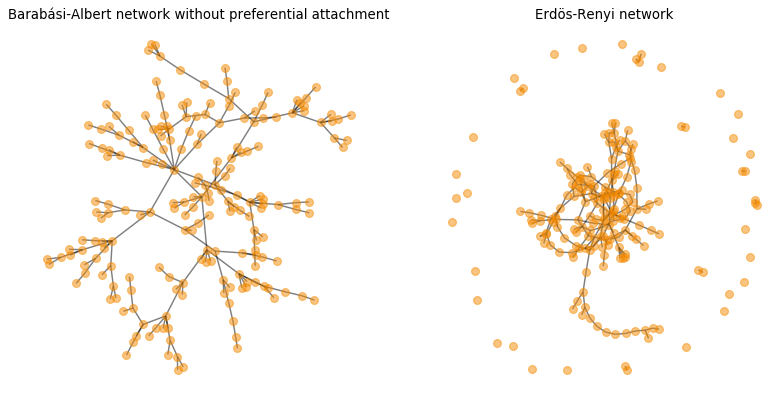

In [36]:
# Network is created without preferential attachment
G_ba_non_pref = nx.Graph()
G_ba_non_pref.add_edge(1,2)
node_num = 200
for node in range(3,node_num+1):
    G_ba_non_pref.add_edge(np.random.choice(list(G_ba_non_pref.nodes())),node)

# Network plot
f = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
nx.draw(G_ba_non_pref, node_size=50, node_shape='o',width=1.3, with_labels=False,node_color="#f58a00",alpha=0.5)
plt.title("Barabási-Albert network without preferential attachment")

# Average k is calculated to create the random network
k = np.average(list(dict(G_ba_non_pref.degree()).values()))
N = node_num
p = k/(N-1)
G_random = nx.gnp_random_graph(N,p)

# Network plot
plt.subplot(1,2,2)
nx.draw(G_random, node_size=50, node_shape='o',width=1.3, with_labels=False,node_color="#f58a00", alpha=0.5)
plt.title('Erdös-Renyi network')
plt.show()


<font color="#0B498F">  The main difference between the two networks is clearly that the BA-network is connected while the random ER network is not. This is a result of how the networks are constructed. By the nature of how we implemented the BA-network, there is a 100 % chance that a new node has an edge drawn between it and another node. Since the network is connected from its beginning, the final network will always be connected. For the ER network, there is a probability $p$, that a node is connected to another node, therefore we will likely end up with nodes with degree zero. 
    
In case the graphs are not clear, we were extract the number of connected components of the two networks:

In [37]:
print(f"Number of connected components for the BA-network: {nx.number_connected_components(G_ba_non_pref)}")
print(f"Number of connected components for the ER-network: {nx.number_connected_components(G_random)}")

<font color="#0B498F"> We now investigate the degree distributions of the two networks. Since the creation of both networks rely on the generation of random numbers, we create 50 of both networks. 

Number of connected components for the BA-network: 1
Number of connected components for the ER-network: 35


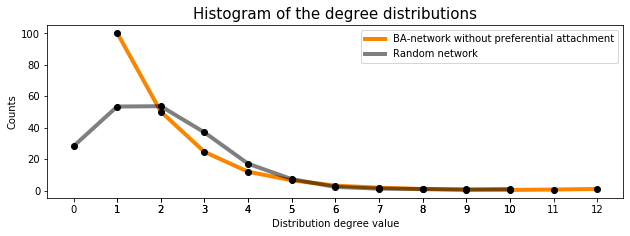

In [38]:
# Empty dictionaries to store bins as keys and list of counts as values.
Gba_dict = {}
Gra_dict = {}

# Outer loop creates the 50x2 networks.
for i in range(50):    
    # Non-preferential attachment BA network is created as before.
    G_ba_non_pref = nx.Graph()
    G_ba_non_pref.add_edge(1,2)
    for node in range(3,node_num+1):
        G_ba_non_pref.add_edge(np.random.choice(list(G_ba_non_pref.nodes())),node)
    
    # k and p are extracted/calculated, and the random network is created.
    k = np.average(list(dict(G_ba_non_pref.degree()).values()))
    p = k/(node_num-1)
    G_random = nx.gnp_random_graph(node_num,p)
    
    # Degree extraction of both networks.
    degreesG_ba = list(dict(nx.degree(G_ba_non_pref)).values()) 
    degreesG_random = list(dict(nx.degree(G_random)).values()) 
    
    # v-vectors for histogram calculation
    v1 = np.arange(min(degreesG_ba)-0.5, max(degreesG_ba)+1.5)
    v2 = np.arange(min(degreesG_random)-0.5, max(degreesG_random)+1.5)
    
    # Histograms to extract counts
    counts1, bin_edges1 = np.histogram(degreesG_ba, v1)
    counts2, bin_edges2 = np.histogram(degreesG_random, v2)
    
    # Centering of bins as seen several times earlier
    x_bins1 = [np.mean((bin_edges1[i],bin_edges1[i+1])) for i in range(len(bin_edges1)-1)]
    x_bins2 = [np.mean((bin_edges2[i],bin_edges2[i+1])) for i in range(len(bin_edges2)-1)]
    
    # For each network, the counts are saved in the relevant dictionary. If the current bin number is not already
    # in the dictionary, it is added.
    for i in range(len(x_bins1)):
        if x_bins1[i] not in Gba_dict.keys(): Gba_dict[x_bins1[i]] = [counts1[i]]
        else: Gba_dict[x_bins1[i]] += [counts1[i]]
    for i in range(len(x_bins2)):
        if x_bins2[i] not in Gra_dict.keys(): Gra_dict[x_bins2[i]] = [counts2[i]]
        else: Gra_dict[x_bins2[i]] += [counts2[i]]
            
# Figure creation
f = plt.figure(figsize=(10, 4))
f.gca().set_position((.1, .3, .8, .6))
ax = f.gca()

# Plotting of degree distribution
plt.plot(list(Gba_dict.keys()),[np.mean(l) for l in Gba_dict.values()],color='#fa8600',linewidth=4,label='BA-network without preferential attachment')
plt.plot(list(Gba_dict.keys()),[np.mean(l) for l in Gba_dict.values()],'o',color='k')
plt.plot(list(Gra_dict.keys()),[np.mean(l) for l in Gra_dict.values()],color='#000000', linewidth=4,alpha=0.5,label='Random network')
plt.plot(list(Gra_dict.keys()),[np.mean(l) for l in Gra_dict.values()],'o',color='k')

# Plot formatting
ax.set_title('Histogram of the degree distributions', fontsize=15)
ax.set_xlabel("Distribution degree value", fontsize=10)
ax.set_ylabel("Counts", fontsize=10)
plt.legend()
# plt.figtext(0, 0, "This is text on the bottom of the figure.\n")
plt.xticks(list(Gra_dict.keys())+ list(Gba_dict.keys()))
plt.show()   

<font color="#0B498F">  As we can see from the above graphs, the two networks differ significantly. The random network somewhat approximates a Poisson distribution, whereas the Barabási-Albert network without preferential attachment is more similar to a power distribution. As can be seen clearly, the BA-network has zero disconnected components, whereas the random network has a significant number of these nodes.

***